In [2]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('../Benchmark/GoogleNews-vectors-negative300.bin', binary=True)


In [29]:
from pyemd import emd  
import gensim, math
import time
import pandas as pd
import nltk 
from os.path import dirname, abspath
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import lda
import numpy as np
import gensim
from nltk import word_tokenize
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import string
import os
from scipy.spatial.distance import cosine
from gensim.matutils import softcossim
from scipy.sparse import csc_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import mixture
from collections import Counter
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data sets

In [55]:
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1()


KeyError: (1,)

# BBC news

In [25]:
class dotdict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

topics = ["business", "entertainment", "politics", "sport", "tech"]
cwd = dirname(os.getcwd())+"/Data/bbc2/"
BBCNews = dotdict({'data': [],
           'label': []})
for i, s in enumerate(topics):
    path = cwd+s
    for filename in os.listdir(path):
        with open(path+"/"+filename, 'r', encoding="latin-1") as f:
            text = f.read()
            BBCNews.data.append(text)
            BBCNews.label.append(i)
        f.close()

2225
2225


In [4]:


texts = ["economics money finance policy politics economy",
         "cat cow dog tiger lion elephant monkey",
         "microeconomics consumption market stock currency production",
        "Obama speaks to the media in Illinois",
         "The president greets the press in Chicago",
        "It's sunny outside, let's have lunch in the sun.",
        "the weather is really nice, why don't we eat outside",
        "snail tastes not aweful, french people are weird",
        "It's sunny outside.",
        "Let's have lunch in the sun.",
         "Artificial intelligence (AI) makes it possible for machines to learn from experience, \
         adjust to new inputs and perform human-like tasks. Most AI examples that you hear about today – from \
         chess-playing computers to self-driving cars – rely heavily on deep learning and natural language \
         processing. Using these technologies, computers can be trained to accomplish specific tasks by processing \
         large amounts of data and recognizing patterns in the data.The term artificial intelligence was coined in \
         1956, but AI has become more popular today thanks to increased data volumes, advanced algorithms, and \
         improvements in computing power and storage.AI adds intelligence to existing products. In most cases, AI \
         will not be sold as an individual application. Rather, products you already use will be improved with AI \
         capabilities, much like Siri was added as a feature to a new generation of Apple products. Automation, \
         conversational platforms, bots and smart machines can be combined with large amounts of data to improve \
         many technologies at home and in the workplace, from security intelligence to investment analysis.",
         "Artificial intelligence (AI, also machine intelligence, MI) is intelligence demonstrated by machines, \
in contrast to the natural intelligence (NI) displayed by humans and other animals. In computer science AI research \
is defined as the study of intelligent agents: any device that perceives its environment and takes actions that \
maximize its chance of successfully achieving its goals. Colloquially, the term artificial intelligence is applied \
when a machine mimics cognitive functions that humans associate with other human minds, such as learning and \
problem solving The scope of AI is disputed: as machines become increasingly capable, tasks considered as requiring \
intelligence are often removed from the definition, a phenomenon known as the AI effect, leading to the quip, \
AI is whatever hasn't been done yet. For instance, optical character recognition is frequently excluded from \
artificial intelligence, having become a routine technology. Capabilities generally classified as AI as of 2017 \
include successfully understanding human speech, competing at the highest level in strategic game systems (such as \
chess and Go), autonomous cars, intelligent routing in content delivery network and military simulations. \
Artificial intelligence was founded as an academic discipline in 1956, and in the years since has experienced several \
waves of optimism followed by disappointment and the loss of funding (known as an AI winter), followed by new \
approaches, success and renewed funding. For most of its history, AI research has been divided into subfields that \
often fail to communicate with each other. These sub-fields are based on technical considerations, such as particular \
goals (e.g. robotics or machine learning), the use of particular tools (logic or neural networks), or deep \
philosophical differences. Subfields have also been based on social factors (particular institutions or the work of \
particular researchers). The traditional problems (or goals) of AI research include reasoning, knowledge \
representation, planning, learning, natural language processing, perception and the ability to move and manipulate \
objects. General intelligence is among the field's long-term goals. Approaches include statistical methods, \
computational intelligence, and traditional symbolic AI. Many tools are used in AI, including versions of search and \
mathematical optimization, neural networks and methods based on statistics, probability and economics. The AI field \
draws upon computer science, mathematics, psychology, linguistics, philosophy and many others.The field was founded \
on the claim that human intelligence can be so precisely described that a machine can be made to simulate it This \
raises philosophical arguments about the nature of the mind and the ethics of creating artificial beings endowed with \
human-like intelligence which are issues that have been explored by myth, fiction and philosophy since antiquity. \
Some people also consider AI to be a danger to humanity if it progresses unabatedly\
Others believe that AI, unlike previous technological revolutions, will create a risk of mass unemployment.\
In the twenty-first century, AI techniques have experienced a resurgence following concurrent advances in computer \
power, large amounts of data, and theoretical understanding; and AI techniques have become an essential part of the \
technology industry, helping to solve many challenging problems in computer science.",
        "UK pioneers digital film network The world's first digital cinema network will be established in the UK over the next 18 months.\
        The UK Film Council has awarded a contract worth £11.5m to Arts Alliance Digital Cinema (AADC), who will set up the network of up to \
        250 screens. AADC will oversee the selection of cinemas across the UK which will use the digital equipment. High definition projectors \
        and computer servers will be installed to show mainly British and specialist films. Most cinemas currently have mechanical projectors but \
        the new network will see up to 250 screens in up to 150 cinemas fitted with digital projectors capable of displaying high definition images. \
        The new network will double the world's total of digital screens. Cinemas will be given the film on a portable hard drive and they will then \
        copy the content to a computer server.\
        Each film is about 100 gigabytes and has been compressed from an original one terabyte-size file. Fiona Deans, associate director of AADC, \
        said the compression was visually lossless so no picture degradation will occur.\
        The film will all be encrypted to prevent piracy and each cinema will have an individual key which will unlock the movie. People will see \
        the picture quality is a bit clearer with no scratches. The picture will look exactly the same as when the print was first made - there is no \
        degradation in quality over time. The key benefit of the digital network will be an increase in the distribution and screening of British films, \
        documentaries and foreign language films.Access to specialised film is currently restricted across the UK, said Pete Buckingham, head of Distribution \
        and Exhibition at the UK Film Council. Although a genuine variety of films is available in central London and a few other metropolitan areas, the choice \
        for many outside these areas remains limited, and the Digital Screen Network will improve access for audiences across the UK, Digital prints costs less than \
        a traditional 35mm print - giving distributors more flexibility in how they screen films, said Ms Deans. It can cost up to £1,500 to make a copy of a print for \
        specialist films. In the digital world you can make prints for considerably less than that. Distributors can then send out prints to more cinemas and prints can \
        stay in cinemas for much longer. The UK digital network will be the first to employ 2k projectors - which are capable of showing films at resolutions of 2048 * 1080 pixels. \
        A separate competitive process to determine which cinemas will receive the digital screening technology will conclude in May. The sheer cost of traditional prints means that \
        some cinemas need to show them twice a day in order to recoup costs. Some films need word of mouth and time to build momentum - they don't need to be shown twice a day, explained \
        Ms Deans. A cinema will often book a 35mm print in for two weeks - even if the film is a roaring success they cannot hold on to the print because it will have to go to another cinema. \
        With digital prints, every cinema will have its own copy."]

In [ ]:
cluster_

In [7]:
#gmm = mixture.BayesianGaussianMixture(n_components=num_clusters, covariance_type='full', 
#                              init_params = 'kmeans', 
#                              weight_concentration_prior_type = 'dirichlet_process').fit(vecs)
#labels = gmm.predict(vecs)

#km = KMeans(n_clusters = num_clusters)
#km.fit(vecs)
start = time.time()
text = texts[-1]
x = texts[-1]
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space    
text = text.translate(translator).lower().split()
text = [t for t in text if t in word2vec ]
wordSum = len(text)
word_counter = Counter(text)
unique_text = list(word_counter.keys())
word_counts = list(word_counter.values())
num_clusters = int(np.sqrt(len(unique_text)))#int(np.sqrt(len(unique_text)))
#print(num_clusters)
vecs = [word2vec[w] for w in unique_text]
print(time.time() - start)
start = time.time()
sc = SpectralClustering(num_clusters, affinity='precomputed', 
                        assign_labels = "kmeans", n_init=100)
similarity_matrix = cosine_similarity(vecs)
sc.fit(similarity_matrix)
print(time.time() - start)
start = time.time()
silhoutte_scores = silhouette_samples(1-similarity_matrix, sc.labels_, metric = 'precomputed')
indices = [np.where(sc.labels_ == i)[0].tolist() for i in range(num_clusters)]

sh_means = [np.mean(np.take(silhoutte_scores, indices[i])) for i in range(num_clusters)]
sh_weights = np.array(sh_means/sum(sh_means))

sizes_weights = np.array([sum(np.take(word_counts, indices[i]))/wordSum for i in range(num_clusters)])
p = 0.3
final_weights = p*sh_weights+(1-p)*sizes_weights
#print("{},{},{}".format(sum(sh_weights), sum(sizes_weights), sum(final_weights)))
centroids = np.array([np.mean(np.take(vecs, indices[i], axis = 0), axis = 0) for i in range(num_clusters)])
rep = np.concatenate([[num_clusters], centroids.flatten(), final_weights])
print(time.time() - start)
#print("{},{}".format(len(text), len(vecs)))

for i in range(num_clusters):
    print(sh_weights[i])
    print("{}".format(np.take(unique_text, np.where(sc.labels_ == i)[0].tolist())))

0.001560211181640625
0.556812047958374
0.011298179626464844
0.0280084
['established' 'awarded' 'set' 'installed' 'fitted' 'given' 'made'
 'restricted' 'available' 'giving' 'employ' 'receive' 'don']
-0.0391861
['pioneers' 'world' 's' 'alliance' 'selection' 'new' 'copy' 'content' 'an'
 'original' 'piracy' 'key' 'quality' 'distribution' 'foreign' 'language'
 'genuine' 'choice' 'distributors' 'flexibility' 'competitive' 'process'
 'order' 'word' 'mouth' 'book' 'success' 'cannot' 'own']
0.0141266
['use' 'see' 'capable' 'drive' 'occur' 'prevent' 'unlock' 'look' 'benefit'
 'access' 'improve' 'make' 'you' 'send' 'stay' 'determine' 'conclude'
 'need' 'build' 'hold' 'go']
0.0872931
['mainly' 'most' 'all' 'individual' 'variety' 'few' 'other' 'many' 'these'
 'limited' 'traditional' 'some' 'often']
0.27641
['film' 'cinema' 'cinemas' 'films' 'movie' 'screening' 'documentaries'
 'audiences']
0.0959104
['digital' 'network' 'equipment' 'projectors' 'computer' 'servers'
 'portable' 'server' 'gigabytes' 

In [8]:
x = np.array([1,2,-1])
x[x>0]

array([1, 2])

# Topic soft cosine distance
build_vec() transforms a text into a vector.
Cluster_TSCD() computes the soft cosine similarity between two text vectors.

In [8]:
#similarity_matrix = np.ones((len(allTopics), len(allTopics)), np.float64)
#for i in range(1, len(allTopics)):
#    for j in range(i):
#        x = time.time()
#        distance_matrix[i, j] = euclidean(allTopics[i], allTopics[j])
#        similarity_matrix[i, j] = 1-cosine(allTopics[i], allTopics[j])
#        similarity_matrix[j, i] = similarity_matrix[i, j]
def build_vec_wtf(text, cls):
    x = text
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space    
    text = text.translate(translator).lower().split()
    start = time.time()
    text = [t for t in text if t in word2vec and not t in stopwords.words("english")]
    if cls == "kmeans":
        num_clusters = math.ceil(np.sqrt(len(set(text))))
        vecs = [word2vec[w] for w in text]
        km = KMeans(n_clusters = num_clusters, random_state=3425, precompute_distances = True)
        km.fit(vecs)
        cluster_sizes = np.array([len(np.where(km.labels_ == i)[0]) for i in range(num_clusters)])
        weights = cluster_sizes/sum(cluster_sizes)
        return np.concatenate([[num_clusters], km.cluster_centers_.flatten(), weights])
    elif cls == "spectral":
        word_counter = Counter(text)
        unique_text = list(word_counter.keys())
        word_counts = list(word_counter.values())
        if len(unique_text) < 3:
            unique_text = unique_text*2
            word_counts = word_counts*2
        num_clusters = math.ceil(np.sqrt(len(unique_text)))
        vecs = [word2vec[w] for w in unique_text]
        sc = SpectralClustering(num_clusters, affinity='precomputed', random_state=3425,
                                assign_labels = "discretize", n_init=100)
        similarity_matrix = cosine_similarity(vecs)+1
        sc.fit(similarity_matrix)
        silhoutte_scores = silhouette_samples(2-similarity_matrix, sc.labels_, metric = 'precomputed')
        non_empty_clusters = set(sc.labels_)
        indices = [np.where(sc.labels_ == i)[0].tolist() if i in non_empty_clusters 
                                                           else [] for i in range(num_clusters)]
        sh_means = [np.mean(np.take(silhoutte_scores, indices[i])) for i in non_empty_clusters]
        sh_weights = np.array(sh_means/sum(sh_means))
        sizes_weights = np.array([sum(np.take(word_counts, indices[i]))/wordSum for i in non_empty_clusters])
        p = 0.2
        weights = p*sh_weights+(1-p)*sizes_weights
        centroids = np.array([np.mean(np.take(vecs, indices[i], axis = 0), axis = 0) for i in non_empty_clusters])
        
        return np.sum([np.multiply(centroids[i], weights[i]) for i in range(len(non_empty_clusters))], axis = 0)

def build_vec_auto(text, cls, strategy):
    x = text
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space    
    text = text.translate(translator).lower().split()
    start = time.time()
    text = [t for t in text if t in word2vec and not t in stopwords.words("english")]
    if cls == "kmeans":
        num_clusters = math.ceil(np.sqrt(len(set(text))))
        vecs = [word2vec[w] for w in text]
        km = KMeans(n_clusters = num_clusters, random_state=3425, precompute_distances = True)
        km.fit(vecs)
        cluster_sizes = np.array([len(np.where(km.labels_ == i)[0]) for i in range(num_clusters)])
        weights = cluster_sizes/sum(cluster_sizes)
        return np.concatenate([[num_clusters], km.cluster_centers_.flatten(), weights])
    elif cls == "spectral":
        if strategy == 0:
            word_counter = Counter(text)
            unique_text = list(word_counter.keys())
            word_counts = list(word_counter.values())
            if len(unique_text) < 3:
                unique_text = unique_text*2
                word_counts = word_counts*2
            num_clusters = math.ceil(np.sqrt(len(unique_text)))
            vecs = [word2vec[w] for w in unique_text]
            sc = SpectralClustering(num_clusters, affinity='precomputed', random_state=3425,
                                    assign_labels = "discretize", n_init=100)
            similarity_matrix = cosine_similarity(vecs)+1
            sc.fit(similarity_matrix)
            silhoutte_scores = silhouette_samples(2-similarity_matrix, sc.labels_, metric = 'precomputed')
            non_empty_clusters = list(set(sc.labels_))
            indices = [np.where(sc.labels_ == i)[0].tolist() if i in non_empty_clusters 
                                                               else [] for i in range(num_clusters)]
            sh_means = np.array([np.mean(np.take(silhoutte_scores, indices[i])) for i in non_empty_clusters])
            pos_sh_means_indices = np.where(sh_means > 0)[0].tolist()
            sh_means = np.take(sh_means, pos_sh_means_indices, axis = 0)
            good_clusters = np.take(non_empty_clusters, pos_sh_means_indices)
            sh_weights = np.array(sh_means/sum(sh_means))
            
            sizes = np.array([sum(np.take(word_counts, indices[i])) for i in good_clusters])
            sizes_weights = sizes/sum(sizes)
            p = 0.3
            weights = p*sh_weights+(1-p)*sizes_weights
            #print("{},{},{}".format(sum(sh_weights), sum(sizes_weights), sum(weights)))
            centroids = np.array([np.mean(np.take(vecs, indices[i], axis = 0), axis = 0) for i in good_clusters])
            rep = np.concatenate([[len(good_clusters)], centroids.flatten(), sizes_weights])
            return rep
        elif strategy == 1:
            word_counter = Counter(text)
            unique_text = list(word_counter.keys())
            word_counts = list(word_counter.values())
            if len(unique_text) < 3:
                unique_text = unique_text*2
                word_counts = word_counts*2
            num_clusters = math.ceil(np.sqrt(len(unique_text)))
            vecs = [word2vec[w] for w in unique_text]
            sc = SpectralClustering(num_clusters, affinity='precomputed', random_state=3425,
                                    assign_labels = "discretize", n_init=100)
            similarity_matrix = cosine_similarity(vecs)+1
            sc.fit(similarity_matrix)
            silhoutte_scores = silhouette_samples(2-similarity_matrix, sc.labels_, metric = 'precomputed')
            silhoutte_contribution = np.multiply(word_counts, silhoutte_scores)
            total_contribution = sum(silhoutte_contribution)
            non_empty_clusters = list(set(sc.labels_))
            indices = [np.where(sc.labels_ == i)[0].tolist() if i in non_empty_clusters 
                                                               else [] for i in range(num_clusters)]
            
            weights = np.array([sum(np.take(silhoutte_contribution, indices[i]))/total_contribution
                                                                        for i in non_empty_clusters])
            #print("{},{},{}".format(sum(sh_weights), sum(sizes_weights), sum(final_weights)))
            centroids = np.array([np.mean(np.take(vecs, indices[i], axis = 0), axis = 0) for i in non_empty_clusters])
            rep = np.concatenate([[len(non_empty_clusters)], centroids.flatten(), weights])
            #for i in range(len(weights)):
             #   print(weights[i])
              #  print(np.take(unique_text, indices[non_empty_clusters[i]]))
            #print("-----")
            return rep
        
    

def cluster_TSCD_auto(a, b):
    def euclidean(a, b):
        return np.sqrt(np.sum(np.square(a-b)))
    start = time.time()
    num_clusters_a, num_clusters_b = int(a[0]), int(b[0])
    cut_a, cut_b = 1+300*num_clusters_a, 1+300*num_clusters_b
    topics1, topics2 = a[1:cut_a].reshape(-1,300), b[1:cut_b].reshape(-1,300)
    weights1, weights2 = a[cut_a:cut_a+num_clusters_a], b[cut_b:cut_b+num_clusters_b]
    allTopics = np.concatenate([topics1,topics2])
    d1 = np.concatenate([weights1,[0]*len(topics2)])
    d2 = np.concatenate([[0]*len(topics1),weights2])
    similarity_matrix = cosine_similarity(allTopics)
    result = d1.T.dot(similarity_matrix).dot(d2)
    vec1 = d1.T.dot(similarity_matrix).dot(d1)
    vec2 = d2.T.dot(similarity_matrix).dot(d2)
    result /= (np.sqrt(vec1)*np.sqrt(vec2))
    #print(time.time()-start)
    return np.clip(1-result, 0 , 1)

def build_vec(text, num_clusters):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    text = text.translate(translator).lower().split()
    vecs = [word2vec[w] for w in text if w in word2vec and not w in stopwords.words("english")]
    km = KMeans(n_clusters = num_clusters, random_state=3425, precompute_distances = True)
    km.fit(vecs)
    cluster_sizes = [len(np.where(km.labels_ == i)[0]) for i in range(num_clusters)]
    return np.append(km.cluster_centers_.flatten(), np.array(cluster_sizes))

def cluster_TSCD(a, b, num_clusters):
    def euclidean(a, b):
        return np.sqrt(np.sum(np.square(a-b)))
    cut = 300*num_clusters
    topics1, topics2 = a[0:cut].reshape(-1,300), b[0:cut].reshape(-1,300)
    freq1, freq2 = a[cut:], b[cut:]
    allTopics = np.concatenate([topics1,topics2])
    
    d1 = np.concatenate([freq1/sum(freq1),[0]*len(topics2)])
    d2 = np.concatenate([[0]*len(topics1),freq2/sum(freq2)])
    similarity_matrix = np.ones((len(allTopics), len(allTopics)), np.float64)
    for i in range(1, len(allTopics)):
        for j in range(i):
            #distance_matrix[i, j] = euclidean(allTopics[i], allTopics[j])
            similarity_matrix[i, j] = 1-cosine(allTopics[i], allTopics[j])
            similarity_matrix[j, i] = similarity_matrix[i, j]
    result = d1.T.dot(similarity_matrix).dot(d2)
    vec1 = d1.T.dot(similarity_matrix).dot(d1)
    vec2 = d2.T.dot(similarity_matrix).dot(d2)
    result /= (np.sqrt(vec1)*np.sqrt(vec2))
    return np.clip(1-result, 0, 1)

def cluster_TSCD_raw(text1, text2, num_clusters):
    return cluster_TSCD(build_vec(text1, num_clusters), build_vec(text2, num_clusters), num_clusters)

def cluster_TSCD_raw_auto(text1, text2, cls, strategy):
    return cluster_TSCD_auto(build_vec_auto(text1, cls, strategy), build_vec_auto(text2, cls, strategy))

start = time.time()

num_clusters = 2
#vecs = [build_vec_auto(t, "kmeans") for t in texts]
#print(time.time() - start)
start = time.time()
#vecs = [build_vec_auto(t, "spectral", 1) for t in texts]
#print(time.time() - start)
#for i in range(1000):
    #cluster_TSCD_auto(vecs[10], vecs[11])
    #print(cluster_WMDdistance(texts[0], texts[i], num_clusters))
#start = time.time()
#for i in range(100):
    #build_vec_auto(texts[-1], "spectral")
#print(time.time() - start)
start = time.time()
#for i in range(100):
    #build_vec_auto(texts[-1], "kmeans")
#print(time.time() - start)
#print(time.time() - start)
#cluster_TSCD_auto(vecs[10], vecs[11])
start = time.time()
print("score: {}".format(cluster_TSCD_raw_auto(texts[-1], texts[-1], "spectral", 0)))
print("time:{}".format(time.time() - start))
start = time.time()
print("score: {}".format(cluster_TSCD_raw_auto(texts[-1], texts[-1], "kmeans", 0)))
print("time:{}".format(time.time() - start))
#print(cluster_WMDdistance(texts[3], texts[4], 3))
#print(vecs[1])

score: 0.0
time:0.20522212982177734
score: 0.0
time:0.360170841217041


# Clustered WMD distance. 
Takes raw text inputs.

In [122]:

def cluster_WMDdistance(text1, text2, num_clusters):
    
    def build_rep(text, num_clusters):
        translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
        text = text.translate(translator).lower().split()
        vecs = [word2vec[w] for w in text if w in word2vec]
        km = KMeans(n_clusters = num_clusters, random_state=3425)
        km.fit(vecs)
        cluster_sizes = [len(np.where(km.labels_ == i)[0]) for i in range(num_clusters)]
        return km.cluster_centers_, np.array(cluster_sizes)
        
    def euclidean(a, b):
        return np.sqrt(np.sum(np.square(a-b)))

    topics1, freq1 = build_rep(text1, num_clusters)
    topics2, freq2 = build_rep(text2, num_clusters)
    allTopics = np.concatenate([topics1,topics2])
    d1 = np.concatenate([freq1/sum(freq1),[0]*len(topics2)])
    d2 = np.concatenate([[0]*len(topics1),freq2/sum(freq2)]) 
    distance_matrix = [ [euclidean(allTopics[i], allTopics[j]) 
                        for j in range(len(allTopics))] 
                           for i in range(len(allTopics)) ]
    #print(distance_matrix)
    return emd(d1, d2, np.array(distance_matrix))




# Word average distance


In [29]:
def wad(text):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    text = text.translate(translator).lower().split()
    text = [t for t in text if not t in stopwords.words("english")]
    return np.mean([word2vec[w] for w in text if w in word2vec], axis=0)

def wordcount(text):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    text = text.translate(translator).lower().split()
    text = [t for t in text if t in word2vec]
    return len(list(set(text)))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
cats = ['comp.graphics',
        'sci.crypt',
        'rec.autos',
        'sci.space',
        'talk.politics.guns',
        'rec.sport.baseball']
news20_train = fetch_20newsgroups(subset='train',categories=cats)
news20_test = fetch_20newsgroups(subset='test',categories=cats)

train_X = news20_train.data
test_X = news20_test.data
train_y = news20_train.target
test_y = news20_test.target

In [33]:
indices_train = [i for i in range(len(train_X)) if wordcount(train_X[i]) > 100 ]
indices_test = [i for i in range(len(test_X)) if wordcount(test_X[i]) > 100]

In [34]:
indices_train = [i for i in range(len(train_X)) if wordcount(train_X[i]) > 100 ]
indices_test = [i for i in range(len(test_X)) if wordcount(test_X[i]) > 100]

l_train_X = np.take(train_X, indices_train)
l_test_X = np.take(test_X, indices_test)
l_train_y = np.take(train_y, indices_train)
l_test_y = np.take(test_y, indices_test)
print("vectorizing")
l_train_vecs = [ build_vec_auto(t,"spectral", 0) for t in l_train_X]
l_test_vecs = [build_vec_auto(t, "spectral", 0) for t in l_test_X]

max_len = np.max(np.concatenate(([len(a) for a in l_train_vecs], [len(a) for a in l_test_vecs])))
l_train_vecs = np.asarray([np.pad(a, (0, max_len - len(a)), 'constant', constant_values=0) for a in l_train_vecs])
l_test_vecs = np.asarray([np.pad(a, (0, max_len - len(a)), 'constant', constant_values=0) for a in l_test_vecs])
#train_vecs = [wad(t) for t in news20_train.data]
print(time.time() - start)

vectorizing
1874.754192829132


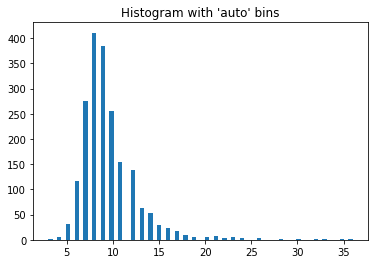

In [35]:
a = [t[0] for  t in l_train_vecs]
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(BBCNews.data, BBCNews.label, test_size=0.3, random_state=42)

In [38]:
print("started KNN ")
#train_vecs_wad = [ wad(t) for t in train_X]
#test_vecs_wad = [ wad(t) for t in test_X]
start = time.time()

#nbrs = GridSearchCV(KNeighborsClassifier(algorithm='ball_tree'), cv = None, 
     #               param_grid={"n_neighbors": range(5,25,5)})
#nbrs = GridSearchCV(KNeighborsClassifier(algorithm='ball_tree', 
 #                           metric=lambda a,b: cluster_TSCD_auto(a, b)), cv = None,
  #                         param_grid={"n_neighbors": range(5,25,5)})
nbrs = KNeighborsClassifier(algorithm='ball_tree', n_neighbors = 10,
                            metric=lambda a,b: cluster_TSCD_auto(a, b))
nbrs.fit(l_train_vecs, l_train_y)
print(time.time() - start)
start = time.time()
#test_vecs = [build_vec(t, num_clusters) for t in news20_test.data]

print("started predicting")
start = time.time()
predicted = nbrs.predict(l_test_vecs)
print(accuracy_score(predicted, l_test_y))
print(time.time() - start)

started KNN 
3.199345111846924
started predicting
0.842654735272
464.11269998550415


In [13]:
print(mt.classification_report(predicted, test_y))

             precision    recall  f1-score   support

          0       0.62      0.93      0.75        27
          1       0.78      1.00      0.88        14
          2       0.82      1.00      0.90        18
          3       0.94      0.62      0.74        47
          4       0.91      0.91      0.91        34
          5       0.97      0.89      0.93        63

avg / total       0.88      0.85      0.85       203



In [18]:
print(mt.classification_report(predicted, test_y))
for i, t in enumerate(test_vecs):
    if test_y[i] == 0:
        print(t[0])

             precision    recall  f1-score   support

          0       0.72      0.97      0.83        30
          1       0.83      1.00      0.91        15
          2       0.86      1.00      0.93        19
          3       0.87      0.66      0.75        41
          4       0.88      0.94      0.91        32
          5       0.95      0.83      0.89        66

avg / total       0.87      0.86      0.86       203

-0.0411658
0.00647455
0.0169582
0.0299543
0.000656661
0.0247794
0.0173201
0.0424855
0.0404512
0.0154711
0.0216071
0.0170083
0.0148304
-0.0197079
0.0303551
0.00789397
-0.0116723
0.00552831
0.0272732
-0.0160297
-0.00865095
-0.00385721
0.024471
0.0144022
0.0263105
0.0351309
0.0353078
0.0577167
0.0270269
0.0153471
0.0168146
0.0182642
0.0339697
0.0403333
0.000163791
-0.01483
0.0225381
0.0347577
0.0409232
0.00787568


In [ ]:
for i in range(0,1,1):
    print(i)
    

In [ ]:
x = np.array([0,1,1])
x.dot(np.array([[1,0,1],[0,1,1],[0,1,0]]))